In [1]:
library(caret)

Loading required package: lattice
Loading required package: ggplot2


# 데이터셋 나누기 7:3

In [4]:
inTrain <- createDataPartition(y = iris$Species, p = 0.7, list = F)
training <- iris[inTrain,]
testing <- iris[-inTrain,]
dim(training); dim(testing)

[1] 105   5

[1] 45  5

# 표준화

In [6]:
training.data <- scale(training[-5])
summary(training.data)

  Sepal.Length      Sepal.Width        Petal.Length      Petal.Width     
 Min.   :-1.8918   Min.   :-2.42390   Min.   :-1.5464   Min.   :-1.4461  
 1st Qu.:-0.9543   1st Qu.:-0.65186   1st Qu.:-1.2150   1st Qu.:-1.1863  
 Median :-0.1339   Median : 0.01266   Median : 0.3314   Median : 0.1126  
 Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.6864   3rd Qu.: 0.67717   3rd Qu.: 0.7180   3rd Qu.: 0.7620  
 Max.   : 2.3270   Max.   : 2.44921   Max.   : 1.7121   Max.   : 1.6713  

# 모델만들기

In [7]:
iris.kmeans <- kmeans(training.data[,-5], centers = 3, iter.max = 10000)
iris.kmeans$centers

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,-0.07533578,-0.9656570,0.3221675,0.2460722
2,-1.01117352,0.8543771,-1.2891960,-1.2382988
3,1.12068120,0.1429546,0.9859950,1.0141723


# 군집 확인

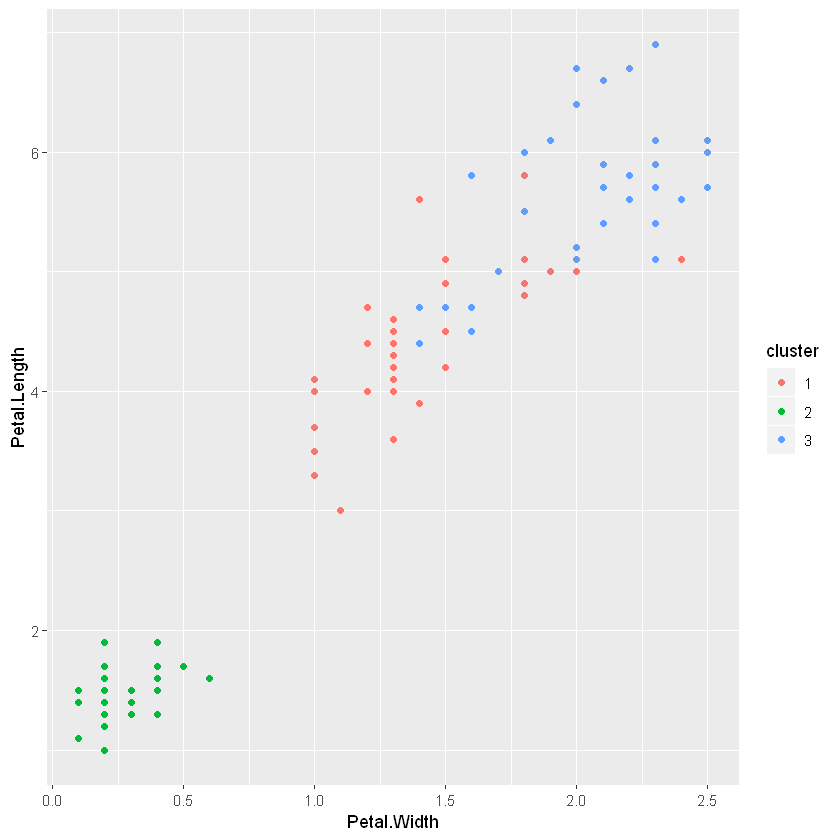

In [8]:
training$cluster <- as.factor(iris.kmeans$cluster)
qplot(Petal.Width, Petal.Length, colour = cluster, data = training)

In [9]:
table(training$Species, training$cluster)

            
              1  2  3
  setosa      0 35  0
  versicolor 27  0  8
  virginica   9  0 26

# 최적의 K 찾기

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


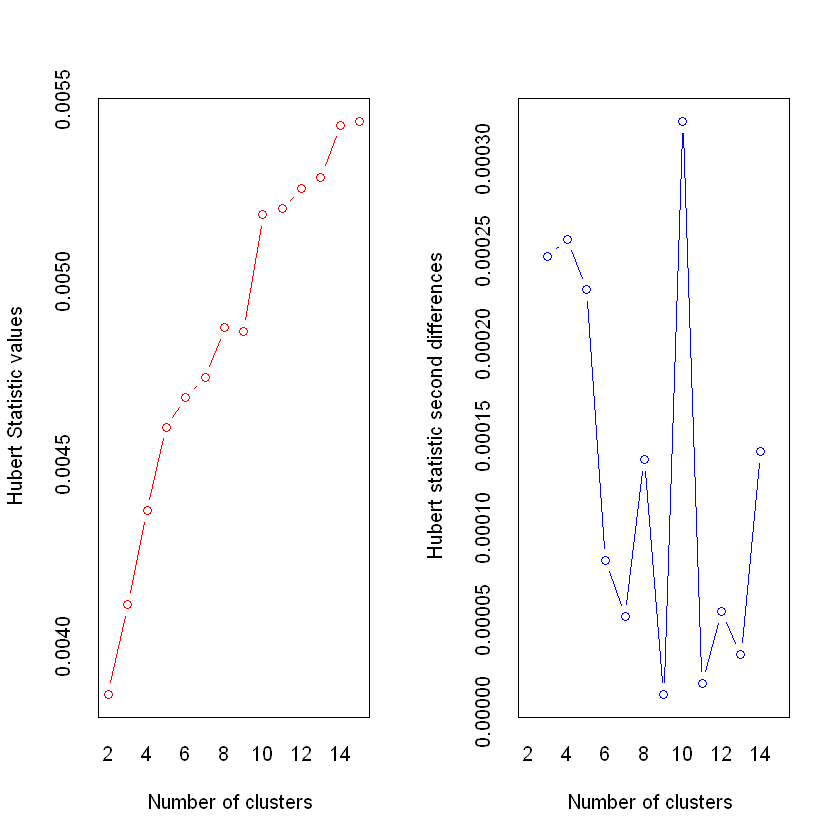

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 6 proposed 2 as the best number of clusters 
* 12 proposed 3 as the best number of clusters 
* 2 proposed 4 as the best number of clusters 
* 1 proposed 8 as the best number of clusters 
* 1 proposed 13 as the best number of clusters 
* 1 proposed 14 as the best number of clusters 
* 1 proposed 15 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  3 
 
 
******************************************************************* 


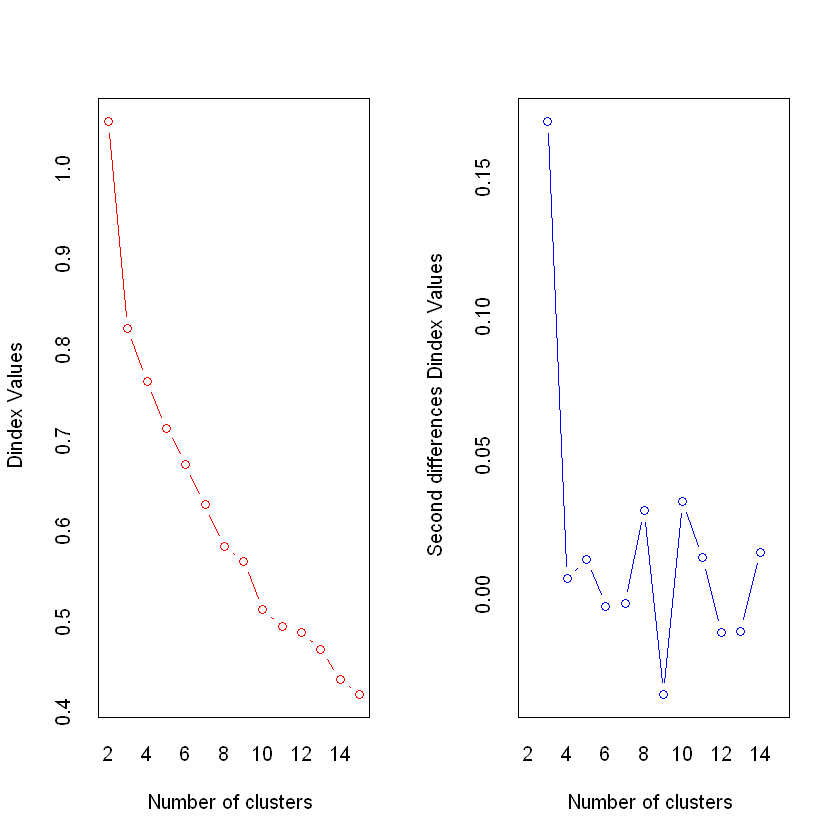

In [12]:
library(NbClust)

nc <- NbClust(training.data, min.nc = 2, max.nc = 15, method = "kmeans")

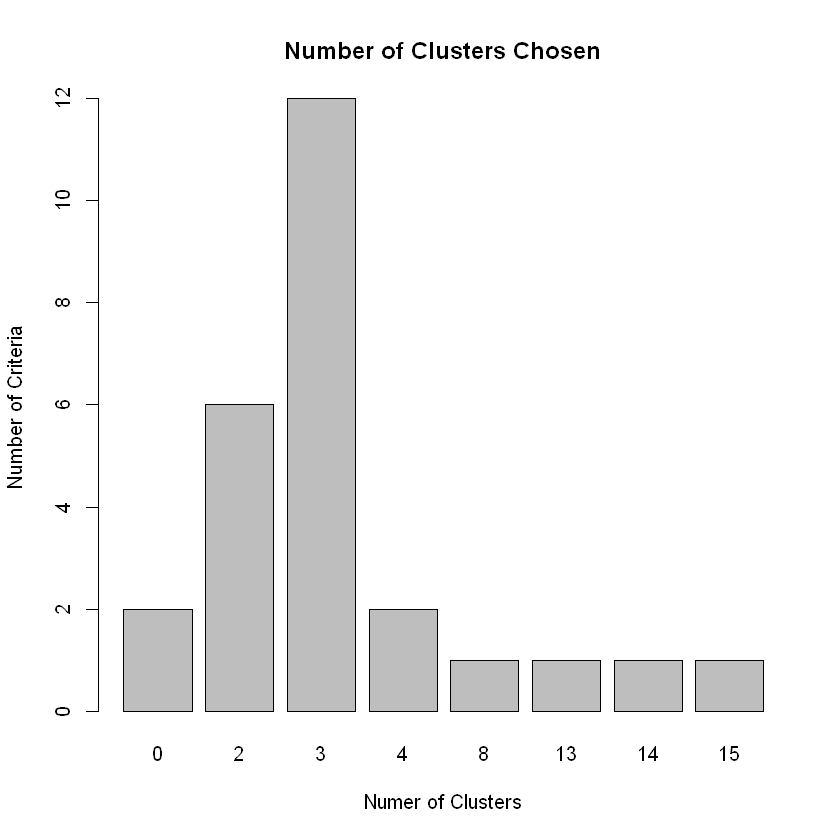

In [13]:
par(mfrow=c(1,1))
barplot(table(nc$Best.n[1,]),
        xlab="Numer of Clusters", ylab="Number of Criteria",
        main="Number of Clusters Chosen")

3개가 가장 적당하다

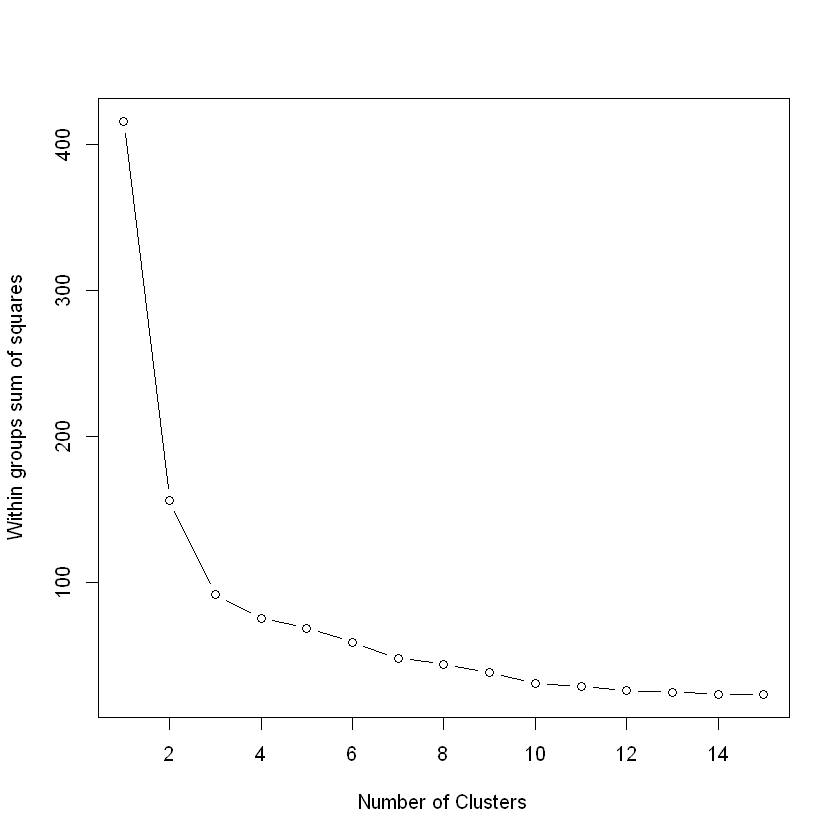

In [14]:
wssplot <- function(data, nc = 15, seed = 1234) {
  wss <- (nrow(data) - 1) * sum(apply(data, 2, var))
  for (i in 2:nc) {
    set.seed(seed)
    wss[i] <- sum(kmeans(data, centers=i)$withinss)}
  plot(1:nc, wss, type="b", xlab = "Number of Clusters",
       ylab = "Within groups sum of squares")}

wssplot(training.data)

# 최종 모델

In [15]:
training.data <- as.data.frame(training.data)
modFit <- train(x = training.data[,-5], 
                y = training$cluster,
                method = "rpart")

testing.data <- as.data.frame(scale(testing[-5]))
testClusterPred <- predict(modFit, testing.data) 
table(testClusterPred ,testing$Species)

               
testClusterPred setosa versicolor virginica
              1      0          9         6
              2     15          0         0
              3      0          6         9